# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import seaborn as sns
from imblearn.combine import SMOTETomek
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from pycomp.viz.insights import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
cd Downloads

/Users/karampruthi/Downloads


# Read the dataset

In [3]:
train_set = pd.read_csv('CE802_P2_Data.csv')  # creating a dataframe for training data
test_set = pd.read_csv('CE802_P2_Test.csv')   # creating a dataframe for testing data

column_name = train_set.columns             
new=train_set
train_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,9.07,34.65,31.22,-10.71,55,39.45,-1.68,-5.98,3.72,20,16.23,-241.52,-7.54,13.70,-6.41,False
1,6.86,99.65,31.22,-11.41,50,30.45,5.55,-8.42,7.11,20,28.47,-421.52,-8.10,14.50,NaN,False
2,10.87,21.65,25.22,-5.98,12,2.91,9.81,-0.36,-12.66,2,30.87,-254.52,0.24,0.40,NaN,False
3,11.27,13.65,25.22,-6.18,33,1.77,1.92,1.84,-2.49,2,27.99,-234.52,0.20,0.30,NaN,False
4,10.19,27.65,29.22,-6.21,30,4.47,1.35,-0.50,-8.19,2,27.63,-266.52,0.44,1.76,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,7.02,104.65,51.22,-12.41,130,15.90,8.61,-9.58,9.18,20,15.42,-396.52,-9.26,12.60,-5.19,False
1496,12.72,31.65,21.22,-6.28,11,2.04,1.38,0.60,-4.50,2,28.20,-254.52,1.88,0.30,NaN,False
1497,7.31,29.65,31.22,-10.86,110,24.90,0.45,-7.46,4.14,20,18.96,-221.52,-8.86,10.10,-5.89,False
1498,5.56,29.65,51.22,-13.86,325,16.35,9.78,-11.12,9.81,20,16.35,-346.52,-11.92,14.00,NaN,False


In [4]:
test_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,6.64,59.65,51.22,-12.11,35,30.75,-2.94,-9.76,4.50,20,22.80,-296.52,-9.82,10.40,NaN,NaN
1,11.42,23.65,29.22,-5.98,1,0.84,5.79,2.52,-7.77,2,28.35,-244.52,0.70,1.18,-8.38,NaN
2,6.13,54.65,51.22,-12.41,55,27.75,-0.81,-10.20,11.07,20,14.88,-341.52,-10.06,13.30,NaN,NaN
3,6.68,9.65,51.22,-10.81,155,21.00,-2.61,-9.16,6.00,20,16.29,-291.52,-7.16,13.10,-6.68,NaN
4,10.74,24.65,25.22,-6.24,5,4.92,0.72,-1.72,-2.52,2,37.02,-271.52,-1.82,1.48,-8.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.29,19.65,71.22,-14.41,140,16.20,-2.31,-8.64,12.36,20,12.96,-366.52,-11.68,11.60,NaN,NaN
1496,10.02,44.65,25.22,-6.25,47,5.85,2.61,-1.84,-3.99,2,28.11,-252.52,-0.92,1.78,NaN,NaN
1497,6.16,129.65,51.22,-11.16,15,15.60,10.62,-8.98,8.79,20,17.37,-426.52,-8.14,19.20,NaN,NaN
1498,5.32,-20.35,51.22,-14.31,305,19.80,11.10,-11.52,11.79,20,15.60,-306.52,-9.22,11.10,-8.13,NaN


# Data visualization

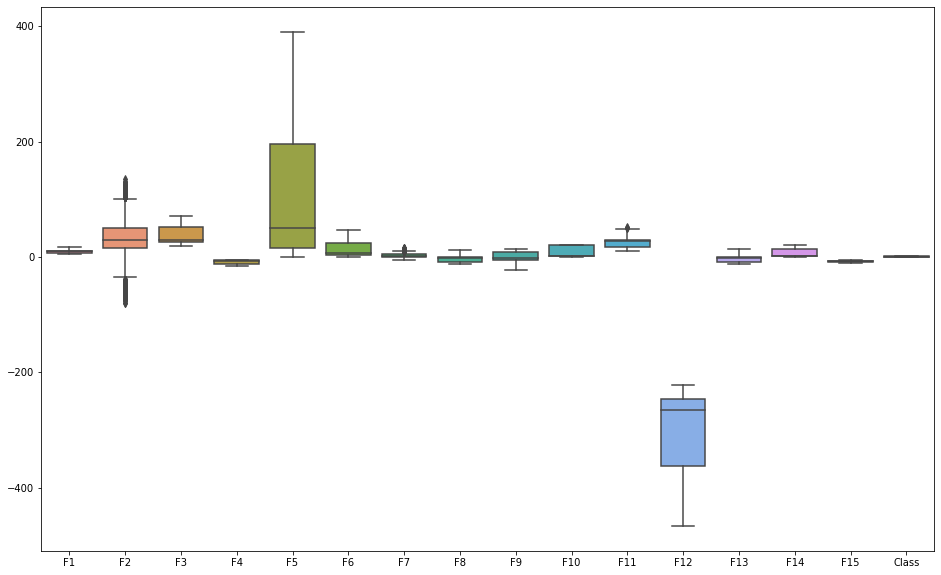

In [5]:
plt.figure(figsize=(16,10)) 
sns.boxplot(data = train_set) # creating boxplot of the dataset

# Checking missing values

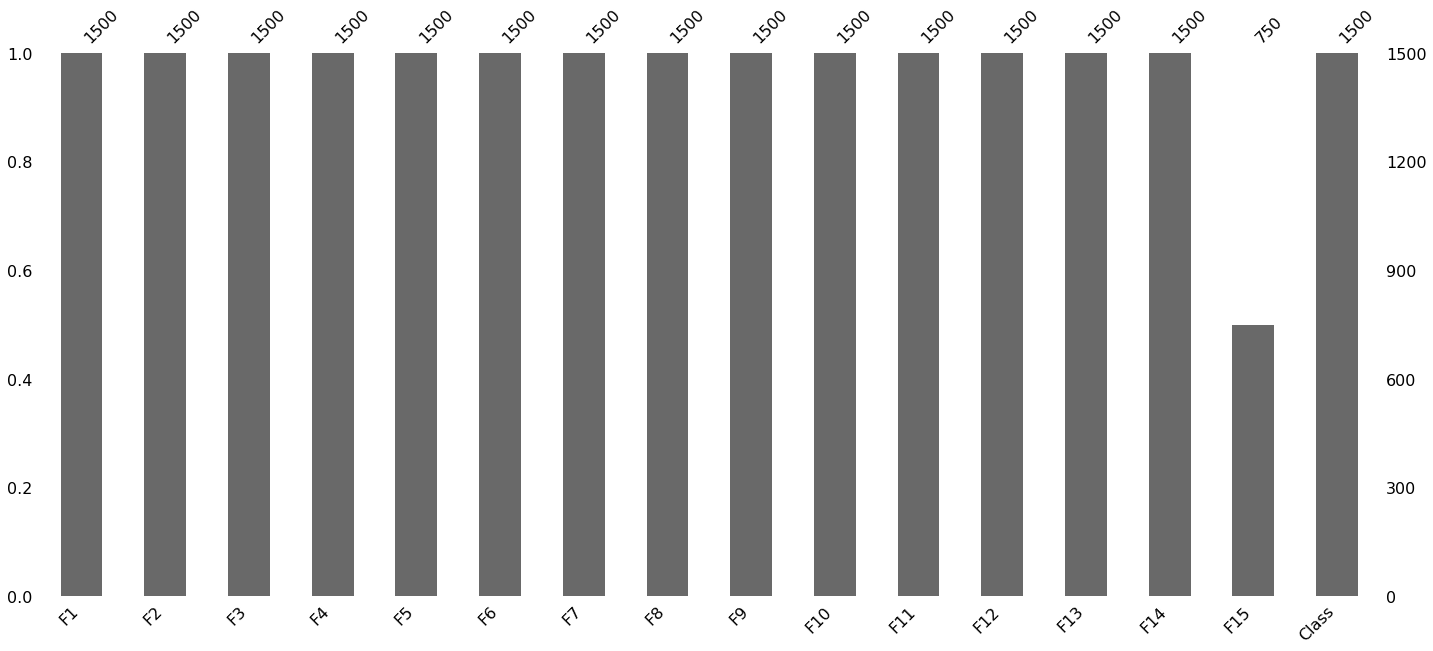

In [6]:
msno.bar(train_set) 

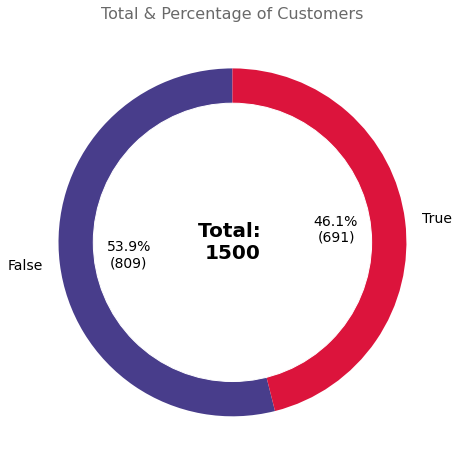

In [7]:
# distribution of Target Variable
plot_donut_chart(df=train_set, col='Class',title='Total & Percentage of Customers') 

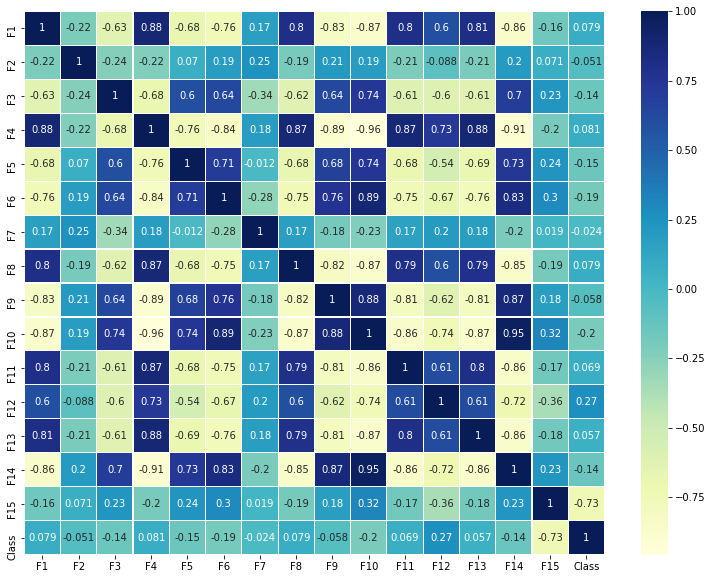

In [8]:
# Heatmap to find correlation between the features
corrmat = train_set.corr()  
f, ax = plt.subplots(figsize =(13, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True)

In [9]:
# Visualzing patterns with pairplot of every column with respect to the Target variable
# sns.pairplot(train_set,hue='Class')

In [10]:
# Iterative Imputer

""" Summary: handling missing values with different imputers
  
    Parameters:dataframe
  
    Returns: input and target after imputing missing values """

def Iterative(df):
    
    from sklearn.impute import IterativeImputer
    new = df
    new = new.drop('Class',axis=1)                        # Dropping Target variable
    imp = IterativeImputer(max_iter=10, random_state= 42) 
    Iter = imp.fit_transform(new.values)                  # Implementing Iterative on the F15 column
    Iter = pd.DataFrame(Iter,columns=column_name[:-1])
    
#     inputs = Iter.drop(['Class'],axis=1)
    inputs = Iter
    target = df['Class']
    
    return inputs,target                                  


# KNN Imputer
def KNN(df):
    
    from sklearn.impute import KNNImputer
    new = df
    new = new.drop('Class',axis=1)                          
    KNN = KNNImputer(n_neighbors=19)
    knn = KNN.fit_transform(new)                            # Implementing Iterative on the F15 column
    knn = pd.DataFrame(knn,columns=column_name[:-1])
    
#     inputs = knn.drop(['Class'],axis=1)
    inputs = knn
    target = df['Class']
    
#     inputs, target = smt.fit_sample(inputs, target)
    
    return inputs,target

In [11]:
# setting various paramters of the algorithms for optimization 
model_params = {        
    'decision_tree': {                                    # DECISION TREE CLASSIFIER
        'model': DecisionTreeClassifier(),
        'params': {
             #'criterion': ['gini'],
           #  'max_depth' : range(3,5)
        }  
    },
    'random_forest': {                                    # RANDOM FOREST CLASSIFIER 
        'model': RandomForestClassifier(),
        'params' : {
            # 'n_estimators': [100,250,500]
        }
    },
    'logistic_regression' : {                             # LOGISTIC REGRESSION
        'model': LogisticRegression(solver='liblinear'),
        'params': {
           # 'C': [1,25,50,75,100]
        }
    },
    'KNN': {                                               # KNN CLASSIFIER
        'model': KNeighborsClassifier(n_neighbors=7),
        'params' : {
          #  'n_neighbors': [2,3,5]
    
        }
            
        },                                                 # SUPPORT VECTOR CLASSIFIER
    'svm': {
        'model': SVC(),
        'params' : {
           # 'C': [14.4],
          #  'gamma': [0.79] 
        }   

        }                         
    }

In [12]:
# GRID SEARCH 

""" Summary: grid search to return best models 
  
    Parameters: training and testing data after train_test_split
  
    Returns: 
    1. print table of the models with all paramters
    2. residual plot of the best_model """

dict = {}                                                    # DICTIONARY FOR ADDING MODEL NAME AND RESULTS
def grid_search(xtrain,ytrain,xtest,ytest):
    
    scores = []
    cv = RepeatedStratifiedKFold(n_splits =10, n_repeats=3)         
    for model_name, mp in model_params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        clf.fit(xtrain,ytrain)
        cv_results = (cross_val_score(clf.best_estimator_,xtrain,ytrain,cv=10))
        
        if model_name in dict.keys():
            dict[model_name].extend(cv_results)
        else:
            dict[model_name] = list(cv_results)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_,
            'test_score' : clf.best_estimator_.score(xtest,ytest),
            'best_classifier' : clf.best_estimator_
            })
        
# SAVING ABOVE PARAMETERS IN A DATAFRAME
    df = pd.DataFrame(scores,columns=['model','best_score','best_params','test_score','best_classifier'])
    print(df[['model','best_score','best_params','test_score']])
    best_row = df[df['test_score'] == (df.test_score.max())]
    best_classifier = best_row['best_classifier'].values
    
# # ROC CURVE OF THE BEST CLASSIFIER FROM GRID SEARCH  
#     plt.figure(figsize=(10,7))
#     fpr, tpr, thresholds = roc_curve(ytest,best_classifier[0].predict(xtest))
#     plt.plot([0, 1], [0, 1], linestyle='--')
#     plt.plot(fpr, tpr, marker='.')
#     plt.show()
#     print('                    ROC CURVE')
    
# HEATMAP OF THE BEST CLASSIFIER FROM GRID SEARCH 
    cm = confusion_matrix(ytest,best_classifier[0].predict(xtest))
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot =True)
    plt.xlabel('PREDICTED')
    plt.ylabel('TRUTH')
    plt.show()
    print('           HEATMAP OF CONFUSION MATRIX')

    from yellowbrick.model_selection import LearningCurve
    sizes = np.linspace(0.3, 1.0, 10)
    model = best_classifier[0]
    visualizer = LearningCurve(model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)

    visualizer.fit(xtrain, ytrain)        # Fit the data to the visualizer
    visualizer.show() 

In [13]:
# FUNCTION TO IMPLEMENT NORMALIZATION ON THE DATA
def scaling(inputs,target):
    
    """ Summary: normaizing with different scaling techniques &
                 spliting data with train_test_split
  
    Parameters: taking inputs & targets from imputer
  
    Returns: 
    1. sending splitted data to grid search function """
    
    scaling_list = ['min_max','quantile','std']
    for method in scaling_list:
        if method == 'min_max':                             # MINMAX SCALER
            from sklearn.preprocessing import MinMaxScaler
            min_max_scaler = MinMaxScaler()
            inputs = min_max_scaler.fit_transform(inputs.values.reshape(-1,len(inputs.columns)))
            x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.25,random_state=45)
            print('          ************** MINMAX SCALER *************')
            smt = SMOTETomek(random_state = 42)                   # fixing random state for reproducibility of the model
            x_train, y_train = smt.fit_sample(x_train, y_train)
            grid_search(x_train,y_train,x_test,y_test)
        
        elif method == 'std':                                # STANDARD SCALER
            from sklearn.preprocessing import StandardScaler   
            inputs = StandardScaler().fit_transform(inputs)
            x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.25,random_state=45)
            print('           ************** STANDARD SCALAR ************')
            x_train, y_train = smt.fit_sample(x_train, y_train)
            grid_search(x_train,y_train,x_test,y_test)
                
        elif method =='quantile':                             # QUANTILE SCALER
            from sklearn.preprocessing import QuantileTransformer
            scaler = QuantileTransformer(output_distribution='normal')
            inputs = scaler.fit_transform(inputs)
            x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.25,random_state=45)
            print('     ******************* QUANTILE SCALAR *****************')
            smt = SMOTETomek(random_state = 42)
            x_train, y_train = smt.fit_sample(x_train, y_train)
            grid_search(x_train,y_train,x_test,y_test)
            print('\n\n')

In [14]:
# CLASS TO HANDLE OUTLIERS IN THE DATA WITH QUANTILE RANGE

""" Summary: to remove outliers with quantile range
  
    Parameters: dataframe
  
    Returns: the dataframe after removing the outliers """

class ThressholdScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, fset=1.5):
        self.fset = fset
        self.outlier_columns = []
        self.lower_limit = {}
        self.upper_limit = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X, columns=column_name)            
        for col_name in X.columns:
            Q1 = X[col_name].quantile(0.01)                           # QUANTILE RANGE
            Q3 = X[col_name].quantile(0.99)
            IQR = Q3-Q1
            self.lower_limit[col_name] = Q1 - self.fset*IQR             # setting lower limit
            self.upper_limit[col_name] = Q3 + self.fset*IQR             # setting upper limit
            if (len(X[( X[col_name]<self.lower_limit[col_name]) | (X[col_name]> self.upper_limit[col_name])][col_name])) >= 1:
                self.outlier_columns.append(col_name)
            #print(self.outlier_columns) 
        return self
    
                                                               # dropping all rows which are outside the limits    
    def transform(self, X, y=None):
        for col_name in self.outlier_columns:
            X = X [ ( X[col_name] > self.lower_limit[col_name]) & (X[col_name]<self.upper_limit[col_name])]
        return X

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        return self.transform(X, y)

          **************  KNN IMPUTER  *****************
          ************** MINMAX SCALER *************
                 model  best_score best_params  test_score
0        decision_tree    0.808909          {}    0.760000
1        random_forest    0.883094          {}    0.861333
2  logistic_regression    0.812103          {}    0.757333
3                  KNN    0.803374          {}    0.789333
4                  svm    0.846105          {}    0.813333


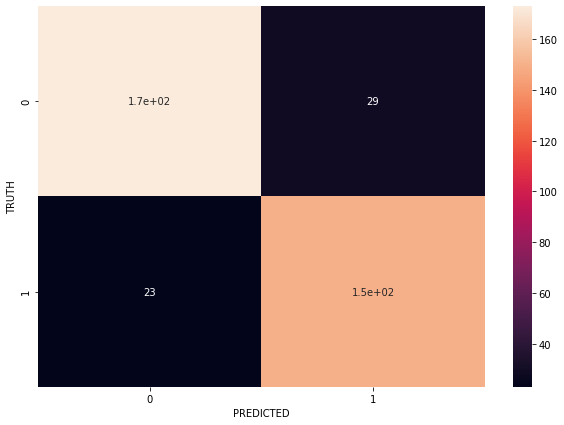

           HEATMAP OF CONFUSION MATRIX


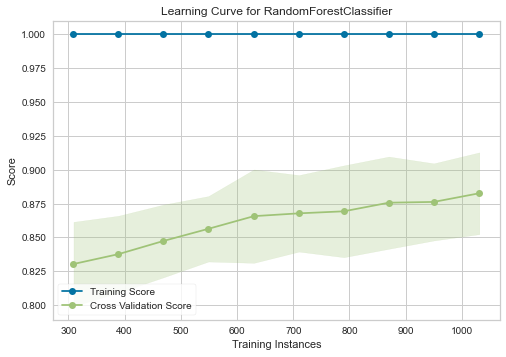

     ******************* QUANTILE SCALAR *****************
                 model  best_score best_params  test_score
0        decision_tree    0.810632          {}    0.813333
1        random_forest    0.889943          {}    0.848000
2  logistic_regression    0.893966          {}    0.850667
3                  KNN    0.861207          {}    0.821333
4                  svm    0.905460          {}    0.869333


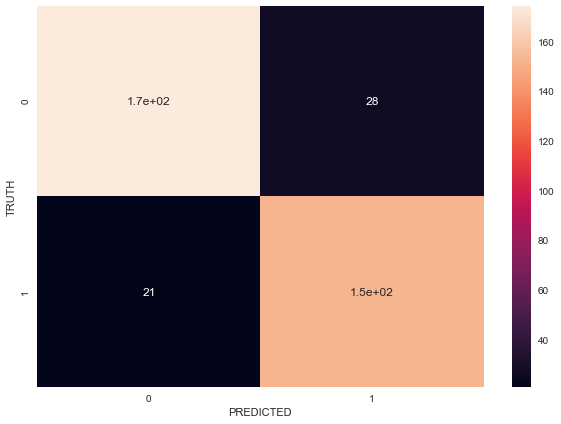

           HEATMAP OF CONFUSION MATRIX


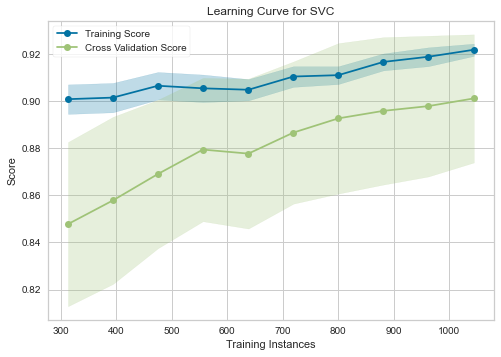




           ************** STANDARD SCALAR ************
                 model  best_score best_params  test_score
0        decision_tree    0.809608          {}    0.808000
1        random_forest    0.890237          {}    0.858667
2  logistic_regression    0.900622          {}    0.850667
3                  KNN    0.860480          {}    0.816000
4                  svm    0.909903          {}    0.866667


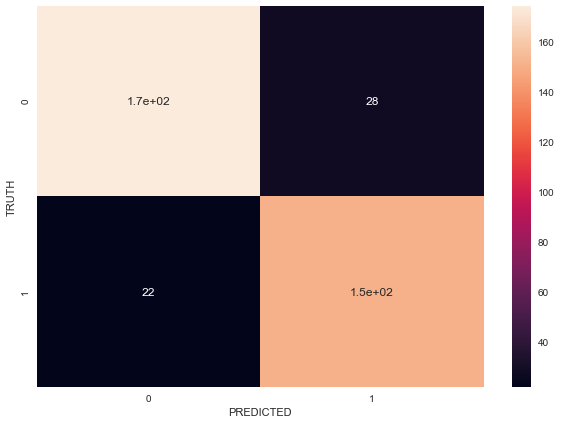

           HEATMAP OF CONFUSION MATRIX


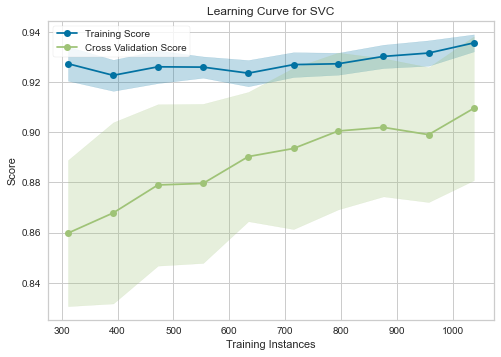

         *************** Dropping F15 ****************
          ************** MINMAX SCALER *************
                 model  best_score best_params  test_score
0        decision_tree    0.786348          {}    0.725333
1        random_forest    0.857419          {}    0.818667
2  logistic_regression    0.728373          {}    0.682667
3                  KNN    0.758348          {}    0.696000
4                  svm    0.770442          {}    0.744000


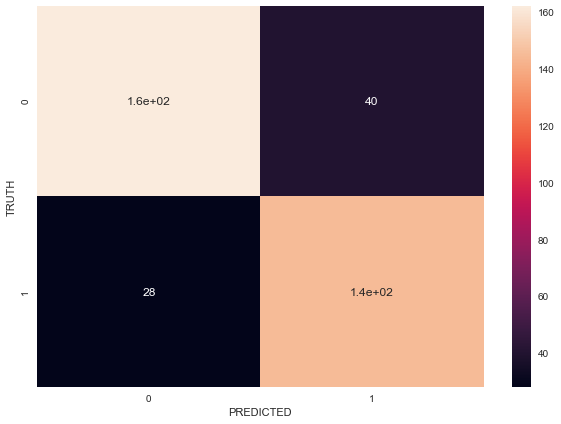

           HEATMAP OF CONFUSION MATRIX


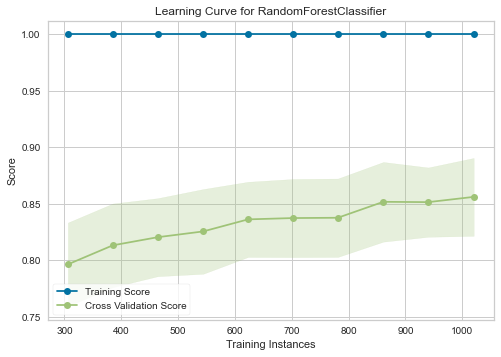

     ******************* QUANTILE SCALAR *****************
                 model  best_score best_params  test_score
0        decision_tree    0.763858          {}    0.744000
1        random_forest    0.854105          {}    0.794667
2  logistic_regression    0.853498          {}    0.808000
3                  KNN    0.831914          {}    0.784000
4                  svm    0.881794          {}    0.853333


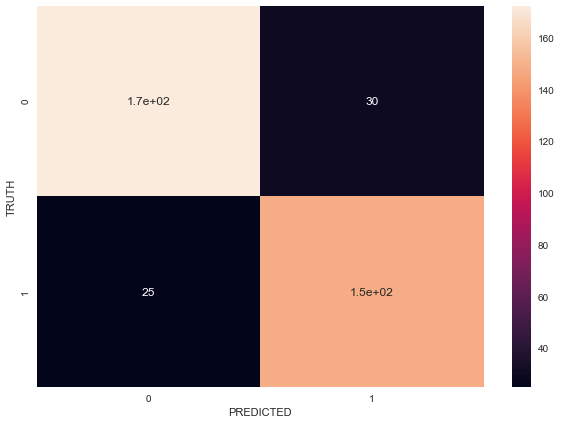

           HEATMAP OF CONFUSION MATRIX


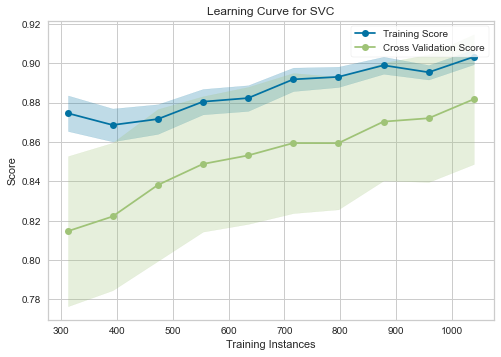




           ************** STANDARD SCALAR ************
                 model  best_score best_params  test_score
0        decision_tree    0.785870          {}    0.744000
1        random_forest    0.858513          {}    0.818667
2  logistic_regression    0.852156          {}    0.808000
3                  KNN    0.827544          {}    0.786667
4                  svm    0.883111          {}    0.832000


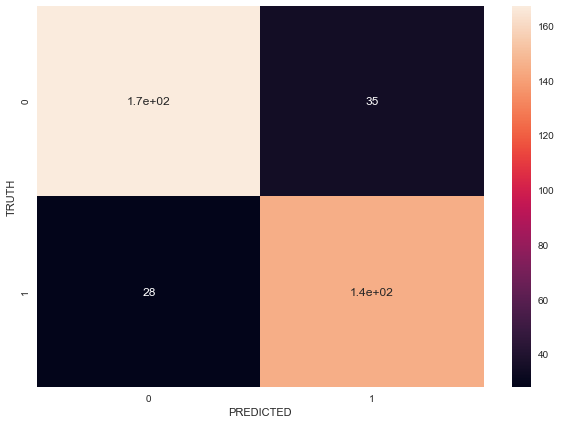

           HEATMAP OF CONFUSION MATRIX


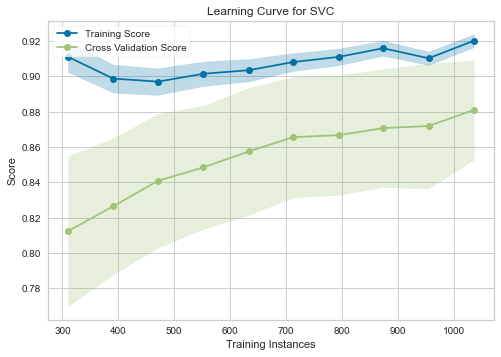

         *************** ITERATIVE IMPUTER ****************
          ************** MINMAX SCALER *************
                 model  best_score best_params  test_score
0        decision_tree    0.826087          {}    0.778667
1        random_forest    0.900290          {}    0.877333
2  logistic_regression    0.835072          {}    0.786667
3                  KNN    0.833913          {}    0.808000
4                  svm    0.857101          {}    0.845333


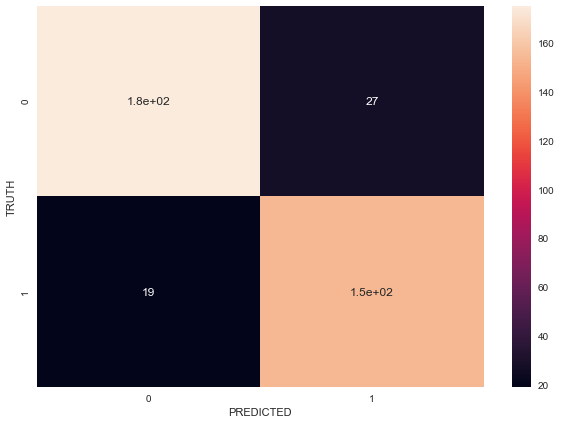

           HEATMAP OF CONFUSION MATRIX


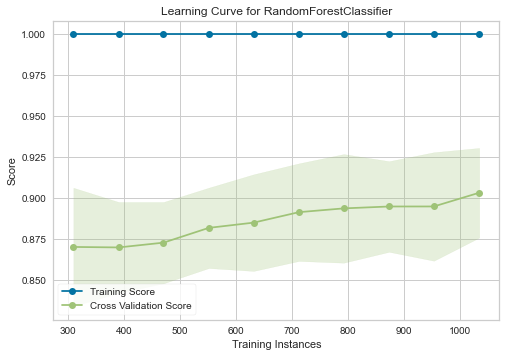

     ******************* QUANTILE SCALAR *****************
                 model  best_score best_params  test_score
0        decision_tree    0.845130          {}    0.784000
1        random_forest    0.901372          {}    0.872000
2  logistic_regression    0.894443          {}    0.861333
3                  KNN    0.879153          {}    0.834667
4                  svm    0.911752          {}    0.866667


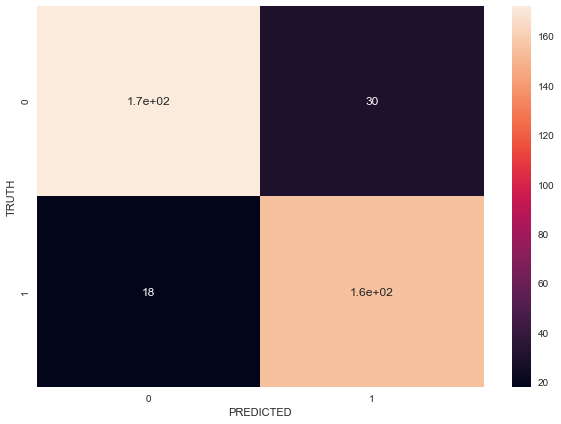

           HEATMAP OF CONFUSION MATRIX


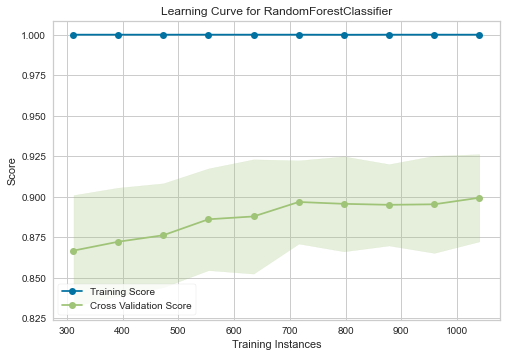




           ************** STANDARD SCALAR ************
                 model  best_score best_params  test_score
0        decision_tree    0.839655          {}    0.781333
1        random_forest    0.900575          {}    0.840000
2  logistic_regression    0.897126          {}    0.861333
3                  KNN    0.872126          {}    0.842667
4                  svm    0.913793          {}    0.872000


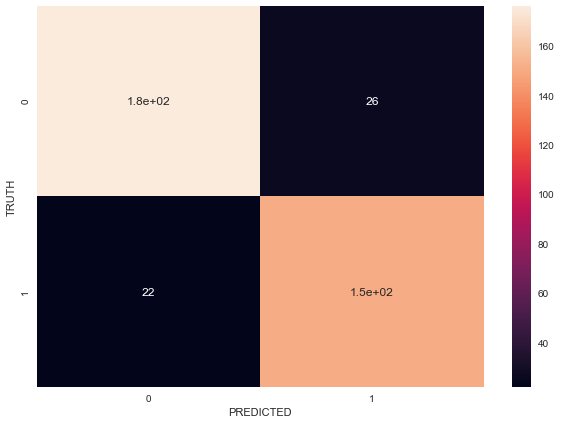

           HEATMAP OF CONFUSION MATRIX


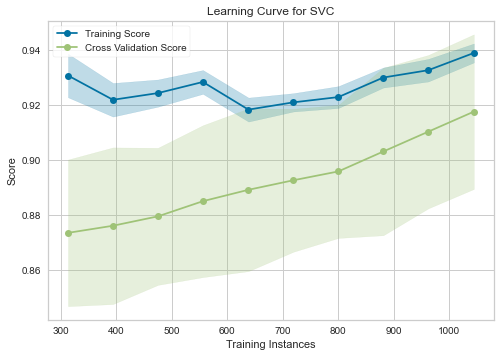

             **************  MEDIAN  *****************
          ************** MINMAX SCALER *************
                 model  best_score best_params  test_score
0        decision_tree    0.813062          {}    0.776000
1        random_forest    0.885564          {}    0.856000
2  logistic_regression    0.800743          {}    0.770667
3                  KNN    0.794928          {}    0.776000
4                  svm    0.838625          {}    0.829333


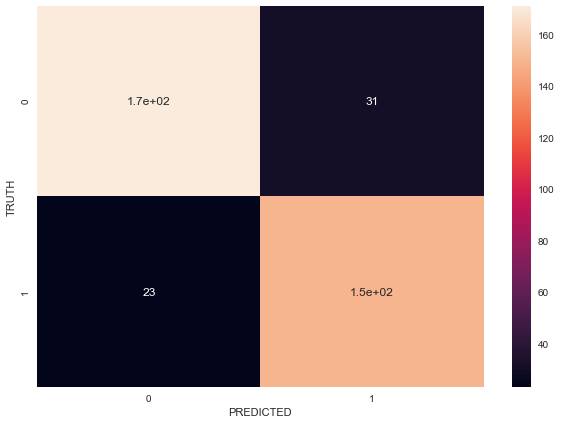

           HEATMAP OF CONFUSION MATRIX


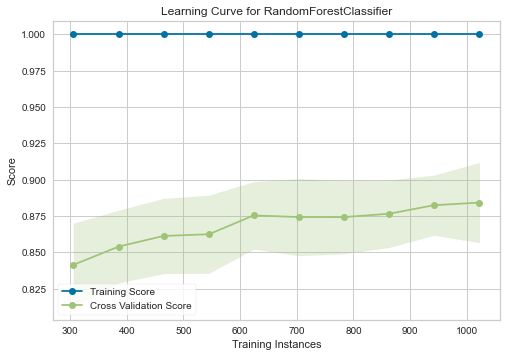

     ******************* QUANTILE SCALAR *****************
                 model  best_score best_params  test_score
0        decision_tree    0.805865          {}    0.730667
1        random_forest    0.886826          {}    0.850667
2  logistic_regression    0.873406          {}    0.853333
3                  KNN    0.857366          {}    0.818667
4                  svm    0.895758          {}    0.858667


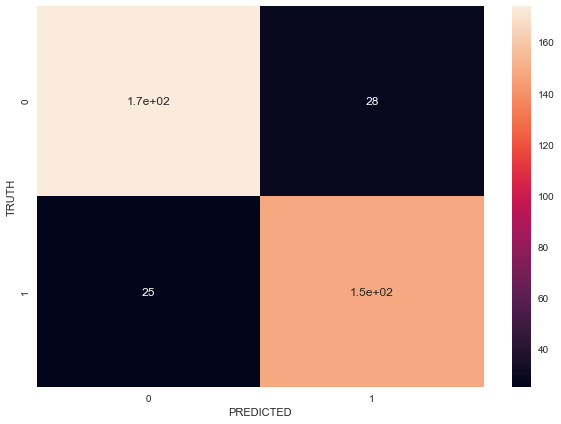

           HEATMAP OF CONFUSION MATRIX


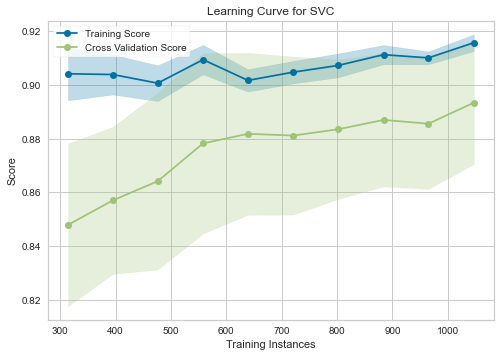




           ************** STANDARD SCALAR ************
                 model  best_score best_params  test_score
0        decision_tree    0.803736          {}    0.752000
1        random_forest    0.893103          {}    0.861333
2  logistic_regression    0.874713          {}    0.858667
3                  KNN    0.855460          {}    0.818667
4                  svm    0.892816          {}    0.864000


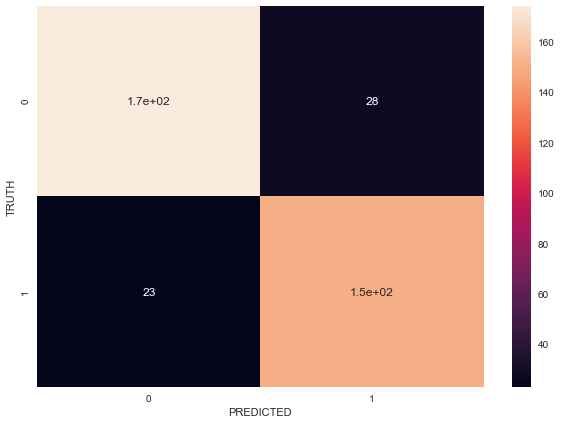

           HEATMAP OF CONFUSION MATRIX


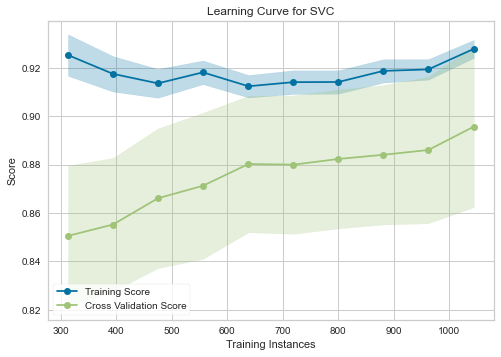

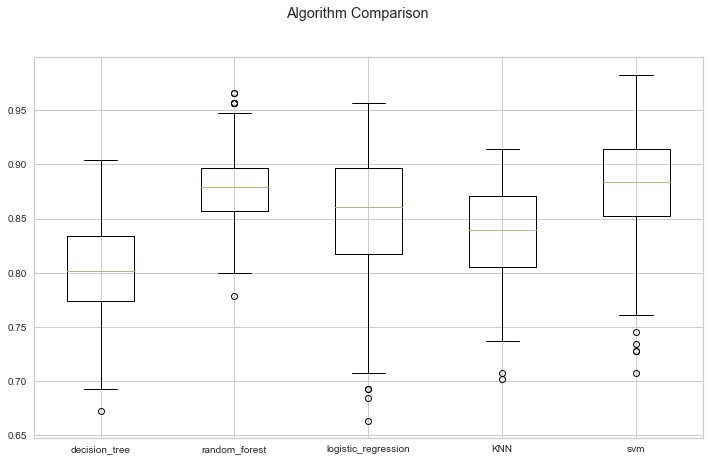

In [15]:
# FUNCTION TO IMPLEMENT DIFFERENT IMPUTATION TECHNIQUES

imputer_list = ['KNN','Drop_F15','Iterative','Median']
for imputer in imputer_list:
    
    if imputer == 'Iterative':                 

        df_new = new.copy()                             # create new dataframe from the original data for preprocessing 

        trs_scalar = ThressholdScaler()
        df_new = trs_scalar.fit_transform(df_new)
        
        inputs,target = Iterative(df_new)
        
    
        print('         *************** ITERATIVE IMPUTER ****************')
        
        scaling(inputs,target)
        

    elif imputer=='KNN':
        
        knn = new.copy()
#         df_new = trs_scalar.fit_transform(df_new)
        inputs,target = KNN(knn)
                
        print('          **************  KNN IMPUTER  *****************')

        scaling(inputs,target)

                
    elif imputer=='Median':
        
        Med = new.copy()
        df_new = trs_scalar.fit_transform(df_new)
        Med.fillna({'F15': Med.F15.median()},inplace=True)
        
        inputs = Med.drop(['Class'],axis=1)
        target = Med['Class']
           
        print('             **************  MEDIAN  *****************')

        scaling(inputs,target)
        
    elif imputer =='Drop_F15':           # BASIC APPROACH DROPPING F15 COLUMN
        
        df15 = new.copy()
        inputs = df15.drop(['F15','Class'],axis=1)
        target = df15['Class']

        
        print('         *************** Dropping F15 ****************')
        
        scaling(inputs,target)


fig = plt.figure(figsize = (12,7)) 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(dict.values()) 
ax.set_xticklabels(dict.keys())
plt.show()

# Traning & Testing on selected model

In [16]:
df = train_set.copy()

# trs_scalar = ThressholdScaler()                 # removing outliers
# df = trs_scalar.fit_transform(df)

inputs = df.drop(['Class'],axis=1)               # dropping target column
target = df['Class']                             
col_names =(inputs.columns)

knn = KNNImputer(n_neighbors=19)               
inputs = knn.fit_transform(inputs)                # handling missing values with Knn

from sklearn.preprocessing import QuantileTransformer  
quantile = QuantileTransformer()
inputs = quantile.fit_transform(inputs)           # normalizing data

x = inputs                                        
y = target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=94)

smt = SMOTETomek(random_state = 1)                   # fixing random state for reproducibility of the model
x_train, y_train = smt.fit_sample(x_train, y_train)

svm = SVC(kernel = 'rbf',C=14.38449888,gamma=0.78475997,)   

svm.fit(x_train,y_train)

print(svm.score(x_test,y_test))
confusion_matrix(y_test,svm.predict(x_test))

0.928


array([[181,  12],
       [ 15, 167]])

In [17]:
(cross_val_score(svm,x_test,y_test,cv=10)).mean()

0.8719061166429588

In [18]:
(cross_val_score(svm,x_train,y_train,cv=10)).mean()

0.9357571214392804

In [19]:
df2 = test_set.copy()

In [20]:
test_inputs = df2.drop(['Class'],axis=1)
test_inputs = knn.transform(test_inputs)
test_inputs = quantile.transform(test_inputs)

In [21]:
Class = svm.predict(test_inputs)

In [22]:
test_set['Class'] = Class

In [23]:
# test_set.to_csv('ML_P2')

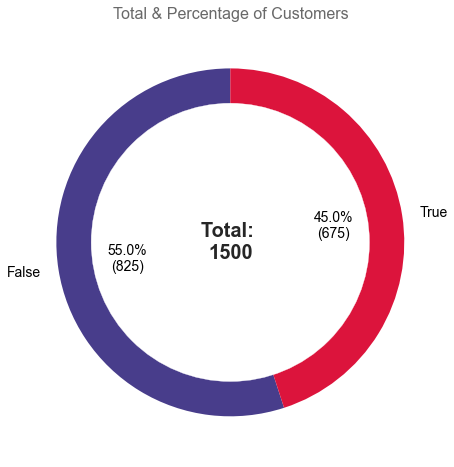

In [24]:
plot_donut_chart(df=test_set, col='Class',title='Total & Percentage of Customers') 

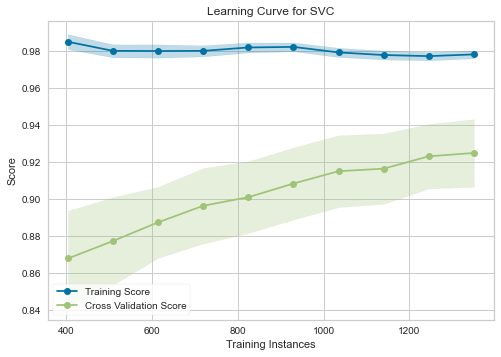

In [25]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
cv = RepeatedStratifiedKFold(n_splits =10, n_repeats=3)         
sizes = np.linspace(0.3, 1.0, 10)
model = svm
visualizer = LearningCurve(model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show() 

In [26]:
svm.score(x_train,y_train)

0.984375

In [27]:
# test_set.to_csv('Testing')

In [28]:
test_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,6.64,59.65,51.22,-12.11,35,30.75,-2.94,-9.76,4.50,20,22.80,-296.52,-9.82,10.40,NaN,False
1,11.42,23.65,29.22,-5.98,1,0.84,5.79,2.52,-7.77,2,28.35,-244.52,0.70,1.18,-8.38,True
2,6.13,54.65,51.22,-12.41,55,27.75,-0.81,-10.20,11.07,20,14.88,-341.52,-10.06,13.30,NaN,True
3,6.68,9.65,51.22,-10.81,155,21.00,-2.61,-9.16,6.00,20,16.29,-291.52,-7.16,13.10,-6.68,False
4,10.74,24.65,25.22,-6.24,5,4.92,0.72,-1.72,-2.52,2,37.02,-271.52,-1.82,1.48,-8.57,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.29,19.65,71.22,-14.41,140,16.20,-2.31,-8.64,12.36,20,12.96,-366.52,-11.68,11.60,NaN,True
1496,10.02,44.65,25.22,-6.25,47,5.85,2.61,-1.84,-3.99,2,28.11,-252.52,-0.92,1.78,NaN,True
1497,6.16,129.65,51.22,-11.16,15,15.60,10.62,-8.98,8.79,20,17.37,-426.52,-8.14,19.20,NaN,True
1498,5.32,-20.35,51.22,-14.31,305,19.80,11.10,-11.52,11.79,20,15.60,-306.52,-9.22,11.10,-8.13,True
